In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Files already downloaded and verified
Files already downloaded and verified


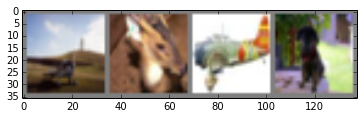

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

In [5]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, (2, 2))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, (2, 2))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        
net = Net()

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [7]:
torch.backends.cudnn.enabled=False

for epoch in range(10):
    
    for i, data in enumerate(trainloader):
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if i % 2000 == 0:
            print("Epoch: %d, Interations: %5d,  Loss: %.3f" % 
                  (epoch, i, loss.data[0]))
print('Finished Training')

Epoch: 0, Interations:     0,  Loss: 2.330
Epoch: 0, Interations:  2000,  Loss: 2.010
Epoch: 0, Interations:  4000,  Loss: 1.839
Epoch: 0, Interations:  6000,  Loss: 2.167
Epoch: 0, Interations:  8000,  Loss: 0.916
Epoch: 0, Interations: 10000,  Loss: 1.903
Epoch: 0, Interations: 12000,  Loss: 2.685
Epoch: 1, Interations:     0,  Loss: 1.500
Epoch: 1, Interations:  2000,  Loss: 1.060
Epoch: 1, Interations:  4000,  Loss: 1.329
Epoch: 1, Interations:  6000,  Loss: 1.891
Epoch: 1, Interations:  8000,  Loss: 0.613
Epoch: 1, Interations: 10000,  Loss: 1.002
Epoch: 1, Interations: 12000,  Loss: 1.070
Epoch: 2, Interations:     0,  Loss: 1.620
Epoch: 2, Interations:  2000,  Loss: 1.296
Epoch: 2, Interations:  4000,  Loss: 0.719
Epoch: 2, Interations:  6000,  Loss: 1.234
Epoch: 2, Interations:  8000,  Loss: 1.376
Epoch: 2, Interations: 10000,  Loss: 1.496
Epoch: 2, Interations: 12000,  Loss: 0.769
Epoch: 3, Interations:     0,  Loss: 1.220
Epoch: 3, Interations:  2000,  Loss: 0.849
Epoch: 3, I

In [8]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the 10000 test images: 62 %
